<a href="https://colab.research.google.com/github/soyebganja/DL-Practice-Projects/blob/main/7%3ANeural%20Networks%20in%20PyTorch/7_2_Datasets_and_DataLoaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

from matplotlib import pyplot as plt


In [13]:
training_data = datasets.FashionMNIST(
    root="data",
    download=True,
    train=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    download=True,
    train=False,
    transform=ToTensor()
)

In [14]:
len(training_data)

60000

In [15]:
len(test_data)

10000

In [19]:
image, label = training_data[0]
label

9

In [20]:
image.squeeze().shape

torch.Size([28, 28])

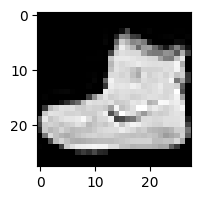

In [25]:
plt.figure(figsize=(2,2))
plt.imshow(image.squeeze(), cmap="gray")
plt.show()

In [26]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

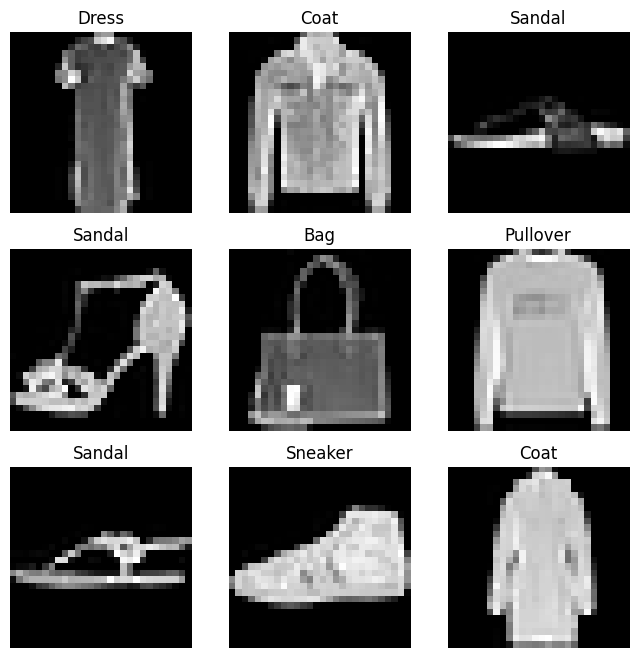

In [28]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows +1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [29]:
from torch.utils.data import DataLoader

training_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [30]:
data_iter = iter(training_dataloader)
images, labels = next(data_iter)

In [32]:
labels.shape

torch.Size([64])

In [34]:
images.shape

torch.Size([64, 1, 28, 28])

In [35]:
images[0].squeeze().shape

torch.Size([28, 28])

In [44]:
labels_map[labels[0].item()]

'Ankle Boot'

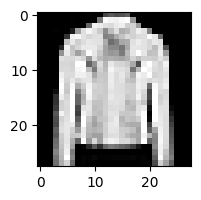

In [46]:
plt.figure(figsize=(2,2))
plt.imshow(images[0].squeeze(), cmap="gray")
plt.show()

In [47]:
for images, labels in training_dataloader:
  print(f"Image batch shape: {images.shape}")
  print(f"Labels batch shape: {labels.shape}")
  break

Image batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
